# 케라스 텍스트 처리 및 임베딩

- 코드 참조: 케라스 창시자에게 배우는 딥러닝



## 용어 설명

- `토큰(token)`
  - 텍스트를 나누는 단위

  - 토큰화(tokenization): 토큰으로 나누는 작업

- `n-gram`
  - 문장에서 추출한 N개(또는 그 이하)의 연속된 단어 그룹

  - 같은 개념이 '문자'에도 적용가능

  <img src="https://www.sqlservercentral.com/wp-content/uploads/legacy/0bf6a2bd621db172dba029ce3c712280a3f6aab3/29444.jpg">

  <sub>출처: https://www.sqlservercentral.com/articles/nasty-fast-n-grams-part-1-character-level-unigrams</sub>

## 문자 수준 원-핫 인코딩

In [1]:
import numpy as np

In [2]:
samples = [
    'The cat sat on the mat.',
    'The dog ate my homeworks.'
]
token_idx = {}

In [3]:
for sample in samples:
    for word in sample.split():
        if word not in token_idx:
            token_idx[word] = len(token_idx) + 1

max_len = 10
res = np.zeros(shape=(len(samples), max_len, max(token_idx.values()) + 1))

In [4]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_len]:
        idx = token_idx.get(word)
        res[i, j, idx] = 1.

res

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

## 케라스를 사용한 단어 수준 원-핫 인코딩

- `fit_on_texts()`

- `texts_to_sequences()`

- `texts_to_matrix()`

In [5]:
from keras.preprocessing.text import Tokenizer

2024-01-16 14:54:04.015961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 14:54:04.016180: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 14:54:04.022781: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 14:54:04.071853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-16 14:54:05.564932: W tensorflow/compiler/tf2

In [6]:
tokenizer = Tokenizer(num_words=1_000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

ohe_res = tokenizer.texts_to_matrix(samples, mode='binary')

word_idx = tokenizer.word_index

print(len(word_idx))

9


In [7]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [8]:
print(ohe_res.shape)
print(ohe_res)

(2, 1000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
word_idx

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homeworks': 9}

### 토큰화 예제

- `OOV` : Out of Vocabulary
  - 새로운 문장에서 기존에 토큰화한 문장에 존재하지 않으면 OOV로 대체됨

In [10]:
samples = [
    "I'm the smartest student.",
    "I'm the best student."
]
tokenizer = Tokenizer(num_words=10, oov_token='<OOV>')
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

binary_res = tokenizer.texts_to_matrix(samples, mode='binary')

print(tokenizer.word_index)

{'<OOV>': 1, "i'm": 2, 'the': 3, 'student': 4, 'smartest': 5, 'best': 6}


In [11]:
binary_res

array([[0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 0.]])

테스트

In [12]:
test = ["I'm the fastest student."]
test_seq = tokenizer.texts_to_sequences(test)

In [13]:
print(f"Word Index: {tokenizer.word_index}")
print(f"Test Text: {test}")
print(f"Test Seq: {test_seq}")

Word Index: {'<OOV>': 1, "i'm": 2, 'the': 3, 'student': 4, 'smartest': 5, 'best': 6}
Test Text: ["I'm the fastest student."]
Test Seq: [[2, 3, 1, 4]]


## 원-핫 단어 벡터와 단어 임베딩

- `원-핫 단어 벡터`
  - 데이터가 희소(sparse)

  - 고차원

- `단어 임베딩`
  - 밀집(dense)

  - 저차원

  <img src="https://freecontent.manning.com/wp-content/uploads/Chollet_DLfT_02.png" width="400">

  <sub>출처: https://freecontent.manning.com/deep-learning-for-text/</sub>

## 단어 임베딩
- 단어간 벡터사이의 **거리가 가까운**, 즉 비슷한 단어들끼리 임베딩

- 거리 외에 임베딩 공간의 특정 방향도 의미를 가질 수 있음


<img src="https://miro.medium.com/max/3010/1*OEmWDt4eztOcm5pr2QbxfA.png">

<sub>출처: https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8</sub>


## Embedding Layer

- 특정 단어를 나타내는 정수 인덱스를 밀집 벡터(dense vector)로 매핑하는 딕셔너리 레이어

- 입력: `(samples, sequence_length)`

- 출력: `(samples, sequnece_length, dim)`

In [14]:
from keras.layers import Embedding

In [15]:
embedding_layer = Embedding(1_000, 64)

embedding_layer

## 예제 : IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [16]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten

### 데이터 로드

In [17]:
n_words = 1_000
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_words)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


### 데이터 확인
- 긍정: 1
- 부정: 0

In [19]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [20]:
for i in range(10):
    if y_train[i] == 0:
        label = '부정'
    else:
        label = '긍정'
    
    print(label, x_train[i])

긍정 [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
부정 [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2

### (참고) IMDB 데이터셋에서 가장 많이 사용된 단어

In [21]:
word_idx = {}

for k, v in imdb.get_word_index().items():
    word_idx[v] = k

for i in range(1, 6):
    print(word_idx[i])

the
and
a
of
to


### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞춰저야 `Embedding` 레이어를 사용할 수 있음

In [22]:
from keras.preprocessing.sequence import pad_sequences

In [23]:
pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [24]:
print(len(x_train[0]))
print(len(pad_x_train[0]))

218
20


In [25]:
print(x_train[0])
print(pad_x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[ 65  16  38   2  88  12  16 283   5  16   2 113 103  32  15  16   2  19
 178  32]


### 모델 구성

In [26]:
model = Sequential()

model.add(Embedding(input_dim=n_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 32)            32000     
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 1)                 641       
                                                                 


Total params: 32641 (127.50 KB)
Trainable params: 32641 (127.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-01-16 14:54:11.239234: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 14:54:11.585825: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 14:54:11.585943: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 14:54:11.602641: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 14:54:11.602695: I external/local_xla/xla/stream_executor

### 모델 컴파일 및 학습

In [27]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [28]:
hist = model.fit(
    pad_x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=.2
)

Epoch 1/20


2024-01-16 14:54:13.087389: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-16 14:54:13.556743: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f84216d4cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-16 14:54:13.556812: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-01-16 14:54:13.566460: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-16 14:54:13.597449: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1705384453.663705    6326 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 11s 16ms/step - loss: 0.6397 - accuracy: 0.6460 - val_loss: 0.5700 - val_accuracy: 0.6994
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 0.5160 - accuracy: 0.7449 - val_loss: 0.5360 - val_accuracy: 0.7216
Epoch 3/20
625/625 [==============================] - 5s 9ms/step - loss: 0.4807 - accuracy: 0.7674 - val_loss: 0.5292 - val_accuracy: 0.7330
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 0.4590 - accuracy: 0.7816 - val_loss: 0.5316 - val_accuracy: 0.7350
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.4379 - accuracy: 0.7957 - val_loss: 0.5373 - val_accuracy: 0.7248
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.4166 - accuracy: 0.8109 - val_loss: 0.5460 - val_accuracy: 0.7240
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.3954 - accuracy: 0.8252 - val_loss: 0.5585 - val_accuracy: 0.7178
Epoch 8/20
625/

### 시각화

In [29]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

In [30]:
hist_dict = hist.history

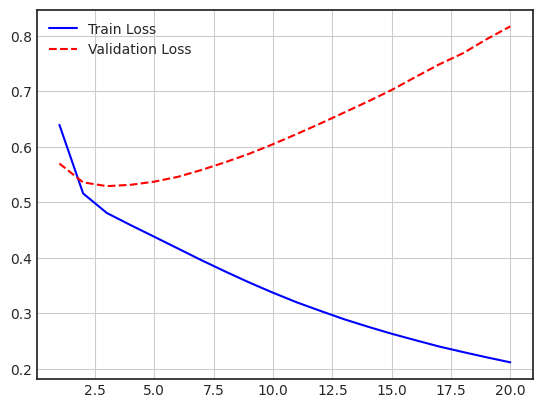

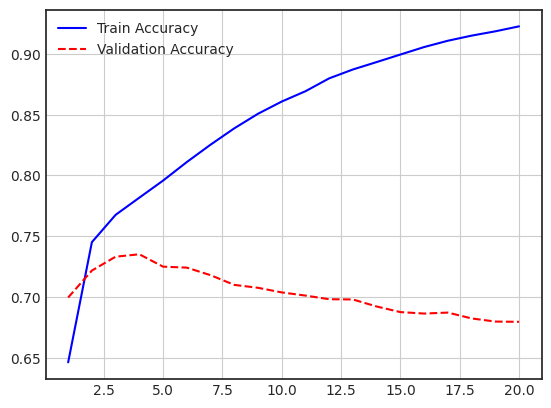

In [31]:
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
accuracy = hist_dict['accuracy']
val_accuracy = hist_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, accuracy, 'b-', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r--', label='Validation Accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [32]:
model.evaluate(pad_x_test, y_test)

 18/782 [..............................] - ETA: 4s - loss: 0.8700 - accuracy: 0.6632

782/782 [==============================] - 4s 5ms/step - loss: 0.8169 - accuracy: 0.6793


[0.8169011473655701, 0.6792799830436707]

### 단어의 수를 늘린 후 재학습

In [33]:
n_words = 1_000
max_len = 500

pad_x_train_2 = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test_2 = pad_sequences(x_test, maxlen=max_len, padding='pre')

데이터 확인

In [34]:
print(x_train[0])
print(pad_x_train_2[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [35]:
model = Sequential()

model.add(Embedding(input_dim=n_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           32000     
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 16001     
                                                                 
Total params: 48001 (187.50 KB)
Trainable params: 48001 (187.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
hist_2 = model.fit(
    pad_x_train_2, y_train,
    epochs=20,
    batch_size=32,
    validation_split=.2
)

Epoch 1/20


625/625 [==============================] - 18s 28ms/step - loss: 0.5362 - accuracy: 0.7216 - val_loss: 0.3704 - val_accuracy: 0.8426
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 0.3213 - accuracy: 0.8619 - val_loss: 0.3324 - val_accuracy: 0.8600
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 0.2713 - accuracy: 0.8889 - val_loss: 0.3375 - val_accuracy: 0.8548
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 0.2306 - accuracy: 0.9093 - val_loss: 0.3448 - val_accuracy: 0.8536
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.1912 - accuracy: 0.9296 - val_loss: 0.3637 - val_accuracy: 0.8480
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 0.1528 - accuracy: 0.9485 - val_loss: 0.3958 - val_accuracy: 0.8436
Epoch 7/20
625/625 [==============================] - 5s 9ms/step - loss: 0.1203 - accuracy: 0.9629 - val_loss: 0.4153 - val_accuracy: 0.8394
Epoch 8/20


In [37]:
hist_dict_2 = hist_2.history

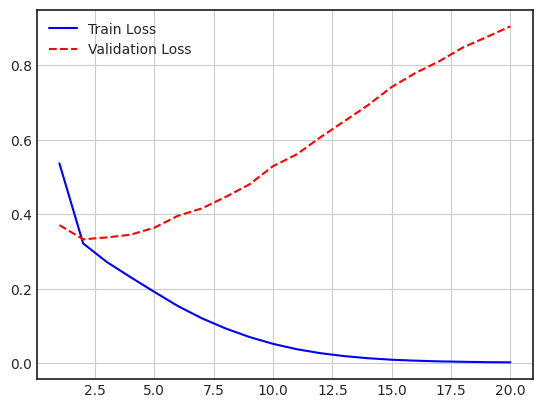

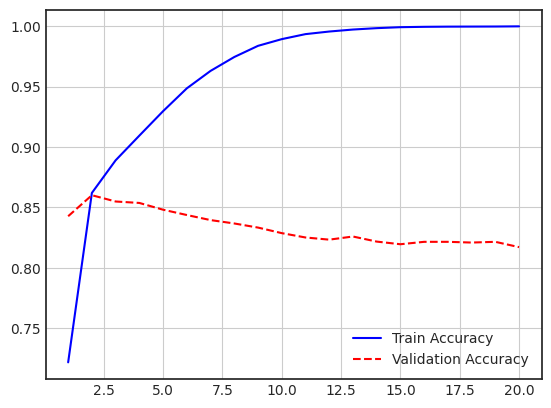

In [38]:
loss = hist_dict_2['loss']
val_loss = hist_dict_2['val_loss']
accuracy = hist_dict_2['accuracy']
val_accuracy = hist_dict_2['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, accuracy, 'b-', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r--', label='Validation Accuracy')
plt.grid()
plt.legend()

plt.show()

In [39]:
model.evaluate(pad_x_test_2, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.9017 - accuracy: 0.8177


[0.9017248153686523, 0.8176800012588501]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## 단어 임베딩의 종류
- LSA

- Word2Vec

- GloVe

- FastText

- etc..

<!-- ## 사전 훈련된 모델
https://github.com/Hironsan/awesome-embedding-models#pre-trained-word-vectors -->

## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

### 구텐베르크 프로젝트 예제
- 코드 출처 : http://doc.mindscale.kr/km/unstructured/11.html

In [40]:
import requests
import re

### 데이터 다운로드

In [41]:
res = requests.get('https://www.gutenberg.org/files/2591/2591-0.txt')

res

<Response [200]>

### 데이터 전처리

In [42]:
grimm = res.text[2801:530661]
grimm = re.sub(r'[^a-zA-Z\. ]', ' ', grimm)
sentences = grimm.split('. ')
data = [s.split() for s in sentences]

In [43]:
len(data)

3468

In [44]:
data[0]

['SECOND',
 'STORY',
 'THE',
 'SALAD',
 'THE',
 'STORY',
 'OF',
 'THE',
 'YOUTH',
 'WHO',
 'WENT',
 'FORTH',
 'TO',
 'LEARN',
 'WHAT',
 'FEAR',
 'WAS',
 'KING',
 'GRISLY',
 'BEARD',
 'IRON',
 'HANS',
 'CAT',
 'SKIN',
 'SNOW',
 'WHITE',
 'AND',
 'ROSE',
 'RED',
 'THE',
 'BROTHERS',
 'GRIMM',
 'FAIRY',
 'TALES',
 'THE',
 'GOLDEN',
 'BIRD',
 'A',
 'certain',
 'king',
 'had',
 'a',
 'beautiful',
 'garden',
 'and',
 'in',
 'the',
 'garden',
 'stood',
 'a',
 'tree',
 'which',
 'bore',
 'golden',
 'apples']

`gensim` 패키지로부터 WordVec을 불러오기

In [46]:
from gensim.models.word2vec import Word2Vec

`sg` 인자에 0을 넘겨주면 CBOW, 1을 넘겨주면 Skip-gram

In [48]:
model = Word2Vec(data, sg=1, vector_size=100, window=3, min_count=3, workers=6)

### 모델 저장 및 로드

In [49]:
model.save('word2vec.model')

In [50]:
pretrained_model = Word2Vec.load('word2vec.model')

### 단어를 벡터로 변환
- `wv`

In [51]:
pretrained_model.wv['princess']

array([-1.96972102e-01,  2.93415546e-01, -1.42673403e-01,  1.42581493e-01,
       -1.78197137e-04, -3.19089442e-01,  1.35436609e-01,  5.64237893e-01,
       -2.44576082e-01, -2.21375674e-01,  8.53089914e-02, -3.13549131e-01,
       -3.64211239e-02,  8.43344405e-02,  4.21407819e-02, -2.50086427e-01,
        9.54920873e-02, -2.01311395e-01, -1.57430142e-01, -1.82602808e-01,
        1.76090986e-01,  1.47445992e-01,  2.69611865e-01, -1.05564721e-01,
        5.39880618e-02,  2.29685358e-03, -2.61862278e-02, -4.04753685e-02,
       -4.54379730e-02, -9.63444561e-02,  1.64876636e-02, -1.03701890e-01,
        1.26466960e-01, -2.09004804e-01, -1.56163782e-01,  2.13271886e-01,
        6.23586848e-02, -7.04408139e-02, -3.24011333e-02, -1.60203651e-01,
        3.37441899e-02, -1.02743596e-01, -1.43938949e-02,  2.82738600e-02,
        8.70607346e-02,  3.19070108e-02, -2.85452828e-02, -1.25008494e-01,
        2.13152736e-01, -4.59480174e-02,  8.79350752e-02, -5.62898479e-02,
       -5.84548451e-02, -

### 유추 또는 유비(analogy)
- `wv.similarity()`에 두 단어를 넘겨주면 코사인 유사도를 구할 수 있음

In [52]:
pretrained_model.wv.similarity('king', 'prince')

0.8395141

- `wv.most_similar()`에 단어를 넘겨주면 가장 유사한 단어를 추출할 수 있음

In [53]:
pretrained_model.wv.most_similar('king')

[('son', 0.9344686269760132),
 ('daughter', 0.9257616400718689),
 ('woman', 0.9029670357704163),
 ('man', 0.8837988972663879),
 ('queen', 0.8781893849372864),
 ('next', 0.863976776599884),
 ('miller', 0.8626882433891296),
 ('fox', 0.8610942363739014),
 ('wolf', 0.8585749268531799),
 ('cook', 0.851102888584137)]

- `wv_most_similar()`에 `positive`와 `negative`라는 옵션을 넘길 수 있음

In [54]:
pretrained_model.wv.most_similar(positive=['man', 'princess'], negative=['woman'])

[('bird', 0.9675449132919312),
 ('prince', 0.9632386565208435),
 ('cat', 0.9590631723403931),
 ('mouse', 0.9582046866416931),
 ('youth', 0.9543573260307312),
 ('dog', 0.9539681077003479),
 ('eldest', 0.9522969722747803),
 ('peasant', 0.952035129070282),
 ('miller', 0.9499207735061646),
 ('boy', 0.9495090842247009)]

### gensim으로 학습된 단어 임베딩을 Keras에서 불러오기

In [55]:
from keras.models import Sequential
from keras.layers import Embedding

In [57]:
n_words, emb_dim = pretrained_model.wv.vectors.shape

print(n_words, emb_dim)

2446 100


### gensim으로 학습된 단어 임베딩을 케라스의 임베딩 레이어의 가중치로 설정

In [58]:
emb = Embedding(input_dim=n_words, output_dim=emb_dim, trainable=False, weights=[pretrained_model.wv.vectors])

In [60]:
model = Sequential()
model.add(emb)

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         244600    
                                                                 
Total params: 244600 (955.47 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 244600 (955.47 KB)
_________________________________________________________________


In [64]:
i = pretrained_model.wv.index_to_key.index('princess')

In [66]:
model.predict([i])

1/1 [==============================] - 0s 82ms/step


array([[-1.96972102e-01,  2.93415546e-01, -1.42673403e-01,
         1.42581493e-01, -1.78197137e-04, -3.19089442e-01,
         1.35436609e-01,  5.64237893e-01, -2.44576082e-01,
        -2.21375674e-01,  8.53089914e-02, -3.13549131e-01,
        -3.64211239e-02,  8.43344405e-02,  4.21407819e-02,
        -2.50086427e-01,  9.54920873e-02, -2.01311395e-01,
        -1.57430142e-01, -1.82602808e-01,  1.76090986e-01,
         1.47445992e-01,  2.69611865e-01, -1.05564721e-01,
         5.39880618e-02,  2.29685358e-03, -2.61862278e-02,
        -4.04753685e-02, -4.54379730e-02, -9.63444561e-02,
         1.64876636e-02, -1.03701890e-01,  1.26466960e-01,
        -2.09004804e-01, -1.56163782e-01,  2.13271886e-01,
         6.23586848e-02, -7.04408139e-02, -3.24011333e-02,
        -1.60203651e-01,  3.37441899e-02, -1.02743596e-01,
        -1.43938949e-02,  2.82738600e-02,  8.70607346e-02,
         3.19070108e-02, -2.85452828e-02, -1.25008494e-01,
         2.13152736e-01, -4.59480174e-02,  8.79350752e-0

## Keras에서 Word2Vec 직접 학습
- 코드 출처 : http://doc.mindscale.kr/km/unstructured/11.html

### 데이터 준비

In [67]:
from keras.datasets import imdb

In [68]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

- 단어 번호와 단어의 관계를 사전으로 만듦

- 1번은 문장의 시작, 2번은 사전에 없는 단어(OOV)로 미리 지정

In [69]:
word_idx = imdb.get_word_index()

In [70]:
idx_word = {idx + 3: word for word, idx in word_idx.items()}

In [71]:
idx_word[1] = '<STRART>'
idx_word[2] = '<UNKNOWN>'

In [72]:
' '.join(idx_word[i] for i in x_train[0])

"<STRART> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and s

In [74]:
n_words = max(idx_word) + 1

### 텍스트를 단어 번호로 바꾸기

In [75]:
texts = []

for data in x_train:
    text = ' '.join(idx_word[i] for i in data)
    texts.append(text)

In [76]:
len(texts)

25000

- `Tokenizer`를 사용해 텍스트를 단어로 바꿈

In [77]:
from keras.preprocessing.text import Tokenizer

In [79]:
tok = Tokenizer()
tok.fit_on_texts(texts)

new_data = tok.texts_to_sequences(texts)

print(new_data[0])

[29, 11, 19, 13, 41, 527, 969, 1619, 1382, 63, 456, 4450, 64, 3931, 1, 171, 34, 254, 2, 22, 98, 41, 836, 110, 48, 668, 21906, 6, 33, 478, 282, 2, 148, 1, 170, 110, 165, 20599, 334, 383, 37, 1, 170, 4518, 1106, 14, 544, 36, 10, 445, 1, 190, 48, 13, 3, 145, 2017, 16, 11, 19, 1, 1907, 4589, 467, 1, 19, 69, 85, 9, 13, 41, 527, 36, 74, 12, 10, 1245, 1, 19, 14, 513, 14, 9, 13, 623, 15, 18511, 2, 60, 384, 9, 5, 314, 5, 104, 2, 1, 2219, 5230, 13, 478, 64, 3766, 31, 1, 128, 9, 13, 36, 615, 2, 22, 122, 49, 34, 133, 45, 22, 1409, 31, 3, 19, 9, 213, 25, 75, 50, 2, 11, 405, 13, 80, 10308, 5, 1, 105, 115, 5925, 12, 254, 1, 30569, 4, 3735, 2, 721, 34, 69, 41, 527, 474, 23, 397, 315, 44, 4, 1, 11927, 1026, 10, 102, 86, 1, 379, 12, 295, 96, 30, 2065, 54, 23, 139, 3, 192, 7477, 15, 1, 224, 19, 18, 132, 474, 23, 478, 2, 142, 27, 5515, 15, 49, 34, 25, 222, 90, 22, 102, 1, 224, 63, 13, 36, 1332, 86, 9, 13, 281, 2, 13, 4451, 111, 101, 30, 12, 13, 5341, 16, 176, 30]


In [80]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


### 단어쌍 만들기

In [81]:
from keras.preprocessing.sequence import make_sampling_table, skipgrams

In [84]:
VOCAB_SIZE = len(tok.word_index)

print(VOCAB_SIZE)

88582


- 단어를 무작위로 추출하면 자주 나오는 단어가 더 많이 나오게됨

- 이를 방지하기위해 단어를 추출할 확률의 균형을 맞춘 샘플링 표를 생성

In [85]:
table = make_sampling_table(VOCAB_SIZE)

- 두 단어씩 뽑아 좌우 2단어(`window_size=2`)안에 들어있는 경우가 있는지 없는지 확인하여 데이터를 생성

In [86]:
couples, labels = skipgrams(data, VOCAB_SIZE, 2, sampling_table=table)

In [87]:
couples[:5]

[[699, 77751], [16923, 5], [272, 21360], [12255, 2098], [9685, 2878]]

- `labels`에는 윈도우 안에 들어있는 경우가 있으면 1, 없으면 0

In [88]:
labels[:5]

[0, 1, 0, 1, 0]

- 대상 단어는 `word_context`으로, 맥락 단어는 `word_context`로 모음

In [89]:
word_target, word_context = zip(*couples)

- 배열로 바꾼다.

In [90]:
word_target = np.asarray(word_target, dtype='int32')
word_context = np.asarray(word_context, dtype='int32')
labels = np.asarray(labels, dtype='int32')

In [91]:
word_target.shape

(208,)

In [92]:
word_context.shape

(208,)

### Skip-gram 모형

- Skip-gram 모형은 함수형 API를 사용해야 함

In [94]:
from keras.layers import Activation, Dot, Embedding, Flatten, Input, Reshape
from keras.models import Model

In [97]:
def build_model():
    input_target = Input(shape=(1, ))
    input_context = Input(shape=(1, ))

    emb = Embedding(input_dim=VOCAB_SIZE, output_dim=8)
    target = emb(input_target)
    context = emb(input_context)

    dot = Dot(axes=2)([target, context])
    flatten = Reshape((1, ))(dot)
    output = Activation('sigmoid')(flatten)
    skipgram = Model(inputs=[input_target, input_context], outputs=output)

    return skipgram

In [98]:
model = build_model()

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 8)                 708656    ['input_3[0][0]',             
                                                                     'input_4[0][0]']             
                                                                                                  
 dot (Dot)                   (None, 1, 1)                 0         ['embedding_4[0][0]',     

### 모델 컴파일 및 학습

In [99]:
from keras.optimizers import Adam

In [102]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [103]:
model.fit([word_target, word_context], labels, epochs=30)

Epoch 1/30
7/7 [==============================] - 2s 153ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - 1s 135ms/step - loss: 0.6928 - accuracy: 0.6058
Epoch 3/30
7/7 [==============================] - 0s 76ms/step - loss: 0.6925 - accuracy: 0.7308
Epoch 4/30
7/7 [==============================] - 0s 41ms/step - loss: 0.6921 - accuracy: 0.7933
Epoch 5/30
7/7 [==============================] - 0s 41ms/step - loss: 0.6917 - accuracy: 0.8606
Epoch 6/30
7/7 [==============================] - 0s 69ms/step - loss: 0.6912 - accuracy: 0.9135
Epoch 7/30
7/7 [==============================] - 0s 12ms/step - loss: 0.6906 - accuracy: 0.9423
Epoch 8/30
7/7 [==============================] - 0s 67ms/step - loss: 0.6900 - accuracy: 0.9712
Epoch 9/30
7/7 [==============================] - 0s 40ms/step - loss: 0.6892 - accuracy: 0.9760
Epoch 10/30
7/7 [==============================] - 0s 14ms/step - loss: 0.6883 - accuracy: 0.9760
Epoch 11/30
7/7 [==========

### 임베딩 레이어 저장 및 로드

In [104]:
emb = model.layers[2]

In [106]:
emb.get_weights()

[array([[ 0.02953326, -0.01231467,  0.02485777, ...,  0.03410364,
          0.00677773, -0.01743931],
        [ 0.04284837, -0.00838948,  0.00316969, ...,  0.00174909,
         -0.04518452, -0.03253665],
        [ 0.01514145,  0.02051591, -0.00904368, ...,  0.01151476,
         -0.03624302, -0.03300088],
        ...,
        [ 0.01335809, -0.01891587,  0.00817664, ..., -0.02735745,
         -0.00787731,  0.00358933],
        [-0.00658395, -0.04604387, -0.03940339, ...,  0.03963958,
          0.03443715, -0.02041264],
        [ 0.03750762,  0.0228424 ,  0.03112509, ...,  0.0183849 ,
         -0.03579261, -0.044611  ]], dtype=float32)]

In [107]:
np.save('emb.npy', emb.get_weights()[0])

- 임베딩 레이어 로드

In [108]:
w = np.load('emb.npy')

- 임베딩 레이어를 추가할때 `trainable`를 `False`로 하면 추가학습이 이루어 지지 않는다.

In [109]:
emb_ff = Embedding(input_dim=n_words, output_dim=8, input_length=8, weights=[w], trainable=False)

## 사전 훈련된 단어 임베딩 사용하기 : GloVe 임베딩

- 코드 출처: 케라스 창시자에게 배우는 딥러닝

### 원본 IMDB 텍스트 내려받기
- http://mng.bz/0tIo

In [115]:
import zipfile
import io

URL = 'http://mng.bz/0tIo'

res = requests.get(URL, stream=True)
res.raise_for_status()

z = zipfile.ZipFile(io.BytesIO(res.content))
z.extractall('data')

In [116]:
import os

In [117]:
imdb_dir = os.path.join(os.getcwd(), 'data/aclImdb')
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)

    for fname in os.listdir(dir_name):
        with open(os.path.join(dir_name, fname), encoding='utf8') as f:
            texts.append(f.read())
        
        if label_type == 'neg':
            labels.append(0)
        elif label_type == 'pos':
            labels.append(1)

In [120]:
texts[0]

'Not to be confused with the above average supernatural thriller "The Sentinel". The Sentinel was a big bore of a movie for me, not delivering the consistent action, a couple of critics promised on the back. To me it seemed like everyone was Halfassing it, and only there to make some quick cash, because this felt very much like a made for TV film. The Sentinel is a rehash of several better films, like "In The Line Of Fire" this does not have any originality in it, and watching Michael Douglas run around, felt kinda silly in my opinion. The Main problem besides it\'s unoriginality, had to be the poor pace. I often got distracted while trying to view this movie, while looking how much run time was left, more then once. Not only the miscasting with Eva Longoria, who couldn\'t convince worth a lick.<br /><br />Performances. Michael Douglas is usually a dependable actor, here is obviously going through the motions. He does not convince as a man on a run, or a secret agent. His chemistry wit

In [122]:
labels[0]

0

### 데이터 토큰화

In [123]:
max_len = 100
training_samples = 200
validation_samples = 10_000
max_words = 10_000

In [124]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_idx = tokenizer.word_index

print(len(word_idx))

88582


In [125]:
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [126]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [127]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [128]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(200, 100)
(200,)
(10000, 100)
(10000,)


### GloVe 단어 임베딩 내려받기

- https://nlp.stanford.edu/projects/glove

- http://nlp.stanford.edu/data/glove.6B.zip

- 시간 소요 (5~7m)

In [129]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip

--2024-01-16 17:21:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-01-16 17:22:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-01-16 17:22:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [141]:
glove_dir = 'data/glove'
os.makedirs(glove_dir, exist_ok=True)

with zipfile.ZipFile('glove.6B.zip', 'r') as zip:
    zip.extractall(glove_dir)

### 임베딩 전처리
- GloVe 파싱

In [142]:
embeddings_idx = {}
with open(os.path.join(glove_dir, 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_idx[word] = coefs

print(len(embeddings_idx))

400000


In [149]:
embedding_dim = 100
embedding_mat = np.zeros((max_words, embedding_dim))

for word, idx in word_idx.items():
    if idx < max_words:
        embedding_vector = embeddings_idx.get(word)
        if embedding_vector is not None:
            embedding_mat[idx] = embedding_vector

In [150]:
embedding_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.12233   , -0.40965   ,  0.26148   , ...,  0.59744   ,
         0.15876   ,  0.33116001],
       [-0.34647   , -0.025099  , -0.15967999, ..., -0.46772   ,
         0.31848001,  0.15823001],
       [-0.64815003,  0.56138003, -0.27676001, ..., -0.18875   ,
         0.36014   ,  0.56463999]])

### 모델 정의

In [151]:
model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                320032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [152]:
model.layers[0].set_weights([embedding_mat])
model.layers[0].trainable = False

In [153]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [154]:
hist = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/10


7/7 [==============================] - 3s 295ms/step - loss: 1.4579 - accuracy: 0.5450 - val_loss: 0.6928 - val_accuracy: 0.5141
Epoch 2/10
7/7 [==============================] - 1s 227ms/step - loss: 0.6529 - accuracy: 0.6300 - val_loss: 0.7684 - val_accuracy: 0.5002
Epoch 3/10
7/7 [==============================] - 1s 243ms/step - loss: 0.6841 - accuracy: 0.6050 - val_loss: 0.7906 - val_accuracy: 0.5001
Epoch 4/10
7/7 [==============================] - 1s 241ms/step - loss: 0.6486 - accuracy: 0.6300 - val_loss: 0.6905 - val_accuracy: 0.5471
Epoch 5/10
7/7 [==============================] - 1s 239ms/step - loss: 0.5718 - accuracy: 0.7200 - val_loss: 1.1371 - val_accuracy: 0.5001
Epoch 6/10
7/7 [==============================] - 1s 222ms/step - loss: 0.6047 - accuracy: 0.6950 - val_loss: 0.7114 - val_accuracy: 0.5027
Epoch 7/10
7/7 [==============================] - 1s 230ms/step - loss: 0.5037 - accuracy: 0.6550 - val_loss: 0.8679 - val_accuracy: 0.5001
Epoch 8/10
7/7 [===============

In [155]:
model.save_weights('pre_trained_glove_model.h5')

### 시각화

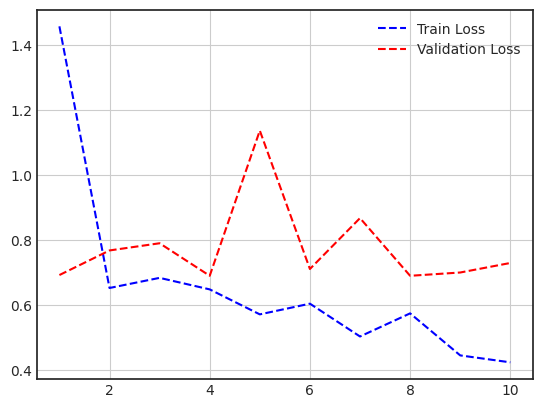

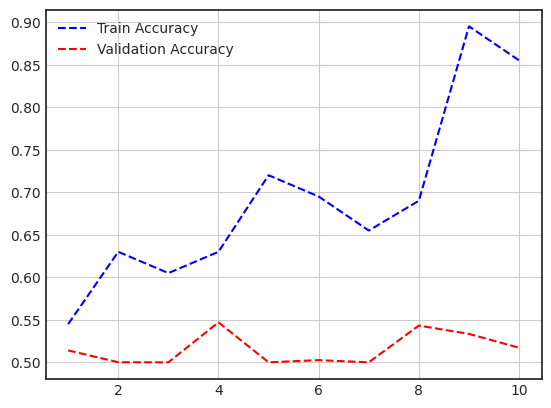

In [157]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='Train Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'b--', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r--', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

## 사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련

In [158]:
model_2 = Sequential()

model_2.add(Embedding(max_words, embedding_dim, input_length=max_len))
model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                320032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
model_2.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

hist_2 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/10
7/7 [==============================] - 3s 332ms/step - loss: 0.6901 - accuracy: 0.5550 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 2/10
7/7 [==============================] - 2s 318ms/step - loss: 0.5616 - accuracy: 0.9700 - val_loss: 0.6958 - val_accuracy: 0.5108
Epoch 3/10
7/7 [==============================] - 2s 351ms/step - loss: 0.4153 - accuracy: 0.9950 - val_loss: 0.6997 - val_accuracy: 0.5229
Epoch 4/10
7/7 [==============================] - 2s 333ms/step - loss: 0.2582 - accuracy: 0.9950 - val_loss: 0.7047 - val_accuracy: 0.5207
Epoch 5/10
7/7 [==============================] - 2s 313ms/step - loss: 0.1458 - accuracy: 0.9950 - val_loss: 0.7047 - val_accuracy: 0.5235
Epoch 6/10
7/7 [==============================] - 2s 350ms/step - loss: 0.0838 - accuracy: 1.0000 - val_loss: 0.7169 - val_accuracy: 0.5261
Epoch 7/10
7/7 [==============================] - 2s 326ms/step - loss: 0.0503 - accuracy: 1.0000 - val_loss: 0.7269 - val_accuracy: 0.5263
Epoch 8/10
7/7 [====

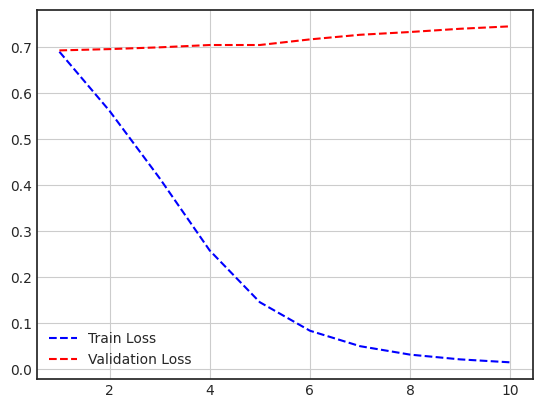

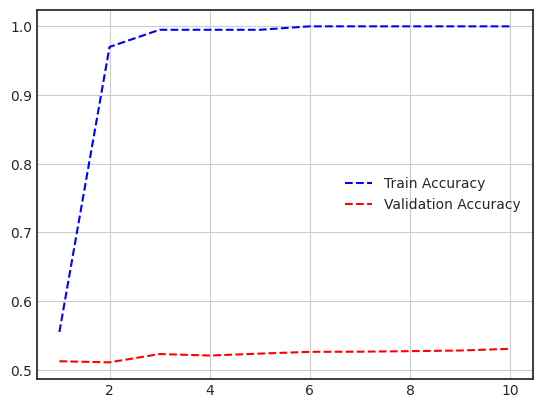

In [161]:
loss = hist_2.history['loss']
val_loss = hist_2.history['val_loss']
accuracy = hist_2.history['accuracy']
val_accuracy = hist_2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='Train Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'b--', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r--', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

### 테스트 데이터 토큰화

In [162]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)

    for fname in os.listdir(dir_name):
        with open(os.path.join(dir_name, fname), encoding='utf8') as f:
            texts.append(f.read())
        
        if label_type == 'neg':
            labels.append(0)
        elif label_type == 'pos':
            labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=max_len)
y_test = np.asarray(labels)

In [163]:
print(x_test.shape)
print(y_test.shape)

(25000, 100)
(25000,)


In [164]:
model.load_weights('pre_trained_glove_model.h5')

model.evaluate(x_test, y_test)

782/782 [==============================] - 5s 6ms/step - loss: 0.7291 - accuracy: 0.5178


[0.7290524244308472, 0.517799973487854]